In [257]:
import glob
import os
import pandas as pd
import numpy as np
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
from scipy.stats import ttest_ind

%matplotlib inline

# Abbott Data Analyst/Data Engineer Challenge
   by Daniel Liu

In [4]:
os.getcwd()

'/Users/Daniel1020/Documents/Business Analytics/Python/Project'

In [5]:
os.chdir('/Users/Daniel1020/Downloads/hw3')

In [ ]:
##Load data 

In [63]:
df_a = pd.concat([pd.read_csv(f) for f in glob.glob('radiation_physician_A*.csv')], ignore_index = True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [60]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18076 entries, 0 to 18075
Data columns (total 8 columns):
Accumulated Dose [mSv]    3345 non-null float64
Accumulated Dose [µSv]    14731 non-null float64
Dose Rate [mSv/h]         18052 non-null float64
Dose Rate [µSv/h]         24 non-null float64
End Time                  18076 non-null object
Start Time                18076 non-null object
Accumulated Dose          18076 non-null float64
physician                 18076 non-null object
dtypes: float64(5), object(3)
memory usage: 1.1+ MB


In [68]:
df_a['Accumulated Dose']=df_a.fillna(0)['Accumulated Dose [mSv]']*1000+df_a.fillna(0)['Accumulated Dose [µSv]']
df_a['Dose Rate']=df_a.fillna(0)['Dose Rate [mSv/h]']*1000+df_a.fillna(0)['Dose Rate [µSv/h]']
df_a['Physician']='A'

In [73]:
df_a_new=df_a[['End Time','Start Time','Accumulated Dose','Dose Rate','Physician']]

,End Time,Start Time,Accumulated Dose,Dose Rate,Physician
0,1/16/2019 10:00:00 PM,1/16/2019 09:00:00 PM,468.07,0.0,A
1,1/16/2019 11:00:00 PM,1/16/2019 10:00:00 PM,468.07,0.0,A
2,1/17/2019 12:00:00 AM,1/16/2019 11:00:00 PM,468.07,0.0,A
3,1/17/2019 01:00:00 AM,1/17/2019 12:00:00 AM,468.07,0.0,A
4,1/17/2019 02:00:00 AM,1/17/2019 01:00:00 AM,468.07,0.0,A


In [52]:
df_b = pd.concat([pd.read_csv(f) for f in glob.glob('radiation_physician_B*.csv')], ignore_index = False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [67]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11187 entries, 0 to 1226
Data columns (total 5 columns):
Accumulated Dose [µSv]    11187 non-null float64
Dose Rate [mSv/h]         10011 non-null float64
Dose Rate [µSv/h]         1176 non-null float64
End Time                  11187 non-null object
Start Time                11187 non-null object
dtypes: float64(3), object(2)
memory usage: 524.4+ KB


In [70]:
df_b['Accumulated Dose']=df_b.fillna(0)['Accumulated Dose [µSv]']
df_b['Dose Rate']=df_b.fillna(0)['Dose Rate [mSv/h]']*1000+df_b.fillna(0)['Dose Rate [µSv/h]']
df_b['Physician']='B'

In [74]:
df_b_new=df_b[['End Time','Start Time','Accumulated Dose','Dose Rate','Physician']]

In [86]:
data_tot=pd.concat([df_a_new,df_b_new])


In [88]:
data_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29263 entries, 0 to 1226
Data columns (total 5 columns):
End Time            29263 non-null object
Start Time          29263 non-null object
Accumulated Dose    29263 non-null float64
Dose Rate           29263 non-null float64
Physician           29263 non-null object
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


In [ ]:
#Question 1
## Maximum Accumulated Dose for Each Pysician

In [100]:
data_tot['Start Time']=pd.to_datetime(data_tot['Start Time'])
data_tot['End Time']=pd.to_datetime(data_tot['End Time'])

In [139]:
idx=data_tot.groupby(['Physician'])['Accumulated Dose'].transform(max)==data_tot['Accumulated Dose']
max_accumulated_dose=data_tot[idx]

In [271]:

##Conclusion: For physician A, 02/07/2019 is the date when  the accumulated dose went to maxumum.
##          It is 02/08/2019 for pysician B to get the maximum acculmulated dose.

In [ ]:
#Question 2
##Visualization

In [172]:
data_tot.head()

,End Time,Start Time,Accumulated Dose,Dose Rate,Physician,date,Start Date
0,2019-01-16 22:00:00,2019-01-16 21:00:00,468.07,0.0,A,2019-01-16 21:00:00,2019-01-16
1,2019-01-16 23:00:00,2019-01-16 22:00:00,468.07,0.0,A,2019-01-16 22:00:00,2019-01-16
2,2019-01-17 00:00:00,2019-01-16 23:00:00,468.07,0.0,A,2019-01-16 23:00:00,2019-01-16
3,2019-01-17 01:00:00,2019-01-17 00:00:00,468.07,0.0,A,2019-01-17 00:00:00,2019-01-17
4,2019-01-17 02:00:00,2019-01-17 01:00:00,468.07,0.0,A,2019-01-17 01:00:00,2019-01-17


In [162]:
data_tot['Start Date']=data_tot['Start Time'].dt.date

In [243]:
data_a_question2=data_tot[(data_tot['Start Date']==dt.date(2019,2,7))& (data_tot['Physician']=='A')] 
data_b_question2=data_tot[(data_tot['Start Date']==dt.date(2019,2,8))& (data_tot['Physician']=='B')]
data_question2=pd.concat([data_a_question2,data_b_question2])
data_question2['Time Series']=data_question2['Start Time'].dt.strftime ('%H:%M:%S')           

In [244]:
data_question2.head()

,End Time,Start Time,Accumulated Dose,Dose Rate,Physician,date,Start Date,Time Series
9639,2019-02-07 01:00:00,2019-02-07 00:00:00,1180.0,0.0,A,2019-02-07 00:00:00,2019-02-07,00:00:00
9640,2019-02-07 02:00:00,2019-02-07 01:00:00,1180.0,0.0,A,2019-02-07 01:00:00,2019-02-07,01:00:00
9641,2019-02-07 03:00:00,2019-02-07 02:00:00,1180.0,0.0,A,2019-02-07 02:00:00,2019-02-07,02:00:00
9642,2019-02-07 03:43:13,2019-02-07 03:00:00,1180.0,0.0,A,2019-02-07 03:00:00,2019-02-07,03:00:00
9643,2019-02-07 03:43:14,2019-02-07 03:43:13,1180.0,70.0,A,2019-02-07 03:43:13,2019-02-07,03:43:13


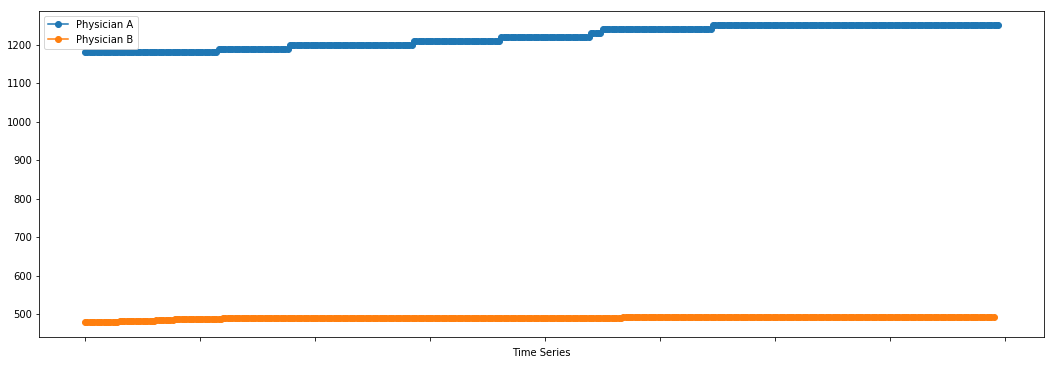

In [240]:
fig,ax=plt.subplots(figsize=(18,6))

data_question2.groupby('Physician').plot(x='Time Series',y='Accumulated Dose',marker='o',ax=ax)
ax.legend(['Physician A','Physician B'])

In [ ]:
## Findings: It seems that the accumulated dose for physician B remains steady in this specific day, while 
##           there is slight fluctuent increase for physician A.

In [250]:
#Question 3
data_question2['log_doserate']=np.log(data_question2['Dose Rate'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


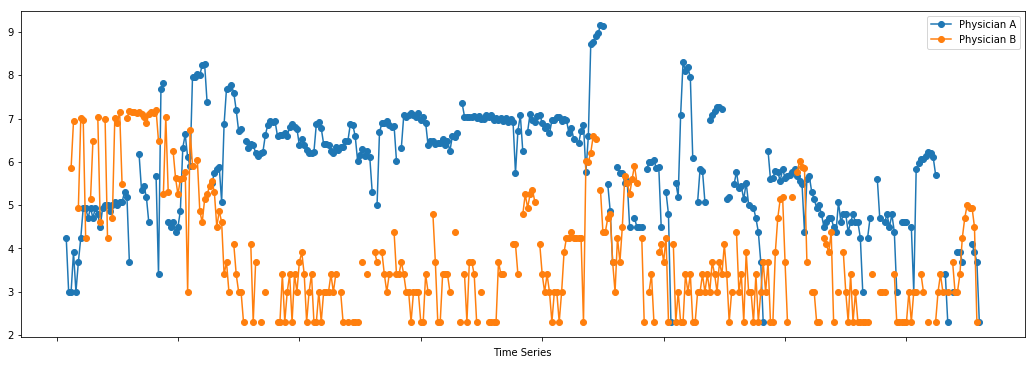

In [256]:
fig,ax=plt.subplots(figsize=(18,6))

data_question2.groupby('Physician').plot(x='Time Series',y='log_doserate',marker='o',ax=ax)
ax.legend(['Physician A','Physician B'])
plt.show()

In [ ]:
## Findings: In the early time of that 02/08/2019, the dose rate for physician B gose up significantly which is even higher than physician A, and keeps comparablely stable in the rest ime.
## However,  the dose rate changes frequently and has a average rate than physicain B.

In [252]:
#Question 4:

In [253]:
data_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29263 entries, 0 to 1226
Data columns (total 7 columns):
End Time            29263 non-null datetime64[ns]
Start Time          29263 non-null datetime64[ns]
Accumulated Dose    29263 non-null float64
Dose Rate           29263 non-null float64
Physician           29263 non-null object
date                29263 non-null datetime64[ns]
Start Date          29263 non-null object
dtypes: datetime64[ns](3), float64(2), object(2)
memory usage: 2.4+ MB


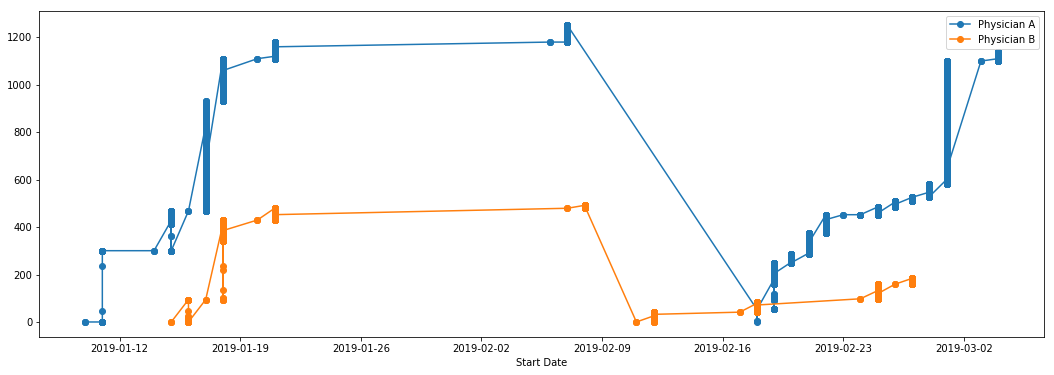

In [254]:
fig,ax=plt.subplots(figsize=(18,6))

data_tot.groupby('Physician').plot(x='Start Date',y='Accumulated Dose',marker='o',ax=ax)
ax.legend(['Physician A','Physician B'])

In [ ]:
##Findings: Generally to say,Physician A gets more dadiation (accumulates dose ) than the other which could be explored using hypothesis experiment, and has a large vairability over days.
##          Physician B has a lower level to radiation exposore, and maitians the same time series trend with physician A.

In [ ]:
## Question 5 
## Check if difference of radiation exposure is statistically significant

In [ ]:
## First, let's see the average level of 'Accumulated Dose'

In [263]:
physician_a=data_tot[data_tot['Physician']=='A']
physician_b=data_tot[data_tot['Physician']=='B']
print ("The average 'Accumulated Dose of Physician A is:", physician_a['Accumulated Dose'].mean())
print ("The average 'Accumulated Dose of Physician B is:", physician_b['Accumulated Dose'].mean())

The average 'Accumulated Dose of Physician A is: 524.1884980084089
The average 'Accumulated Dose of Physician B is: 211.9524921784215


In [ ]:
## The average values of Accumulated Dose tell us physician A is much more exposed to radiation that B.
##  Which is also demonstrated on the above chart.

In [264]:
## Two Sample T test 
ttest_ind(physician_a['Accumulated Dose'],physician_b['Accumulated Dose'],equal_var=False)

Ttest_indResult(statistic=116.2425387245709, pvalue=0.0)

In [ ]:
# Conclusion: P value is less than 0.05 which means we failed to reject the null hypothesis , 
## and it shows the average value between two physicians differs significantly even with holding 95% confidence interval.
